# Titanic Competition

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 

## Introduction

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

filepath = './titanic/train.csv'

titanic_data = pd.read_csv(filepath, index_col='PassengerId')

## I. Exploratory Data Analysis

In [2]:
titanic_data.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S
321,0,3,"Dennis, Mr. Samuel",male,22.0,0,0,A/5 21172,7.2500,NaN,S
138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S
760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S
172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,NaN,Q
833,0,3,"Saad, Mr. Amin",male,NaN,0,0,2671,7.2292,NaN,C
547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.0000,NaN,S


In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


There are 891 rows and 11 columns. The target column we want to predict is Survived (Classification problem).

### 1. Numerical columns

In [4]:
num_cols = titanic_data.select_dtypes(exclude=['object']).columns

num_cols

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [5]:
num_data = titanic_data[num_cols]

num_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
num_data.shape

(891, 6)

There are 6 numerical columns including the target column Survived.

#### Count plots

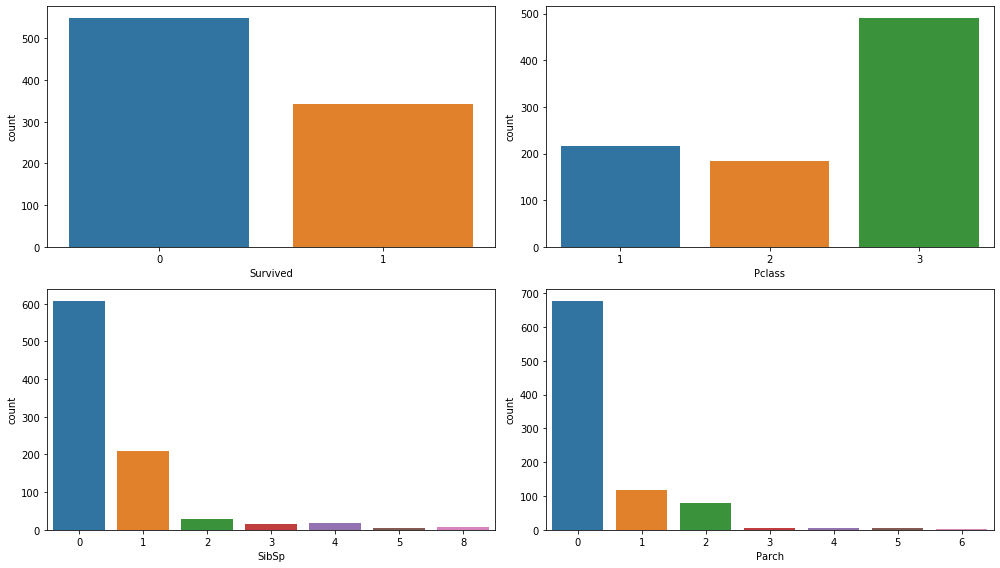

In [7]:
num_plot = ['Survived', 'Pclass', 'SibSp', 'Parch']

fig = plt.figure(figsize=(14,8))

for i in range(num_data[num_plot].shape[1]):
    fig.add_subplot(2,2,i+1)
    sns.countplot(num_data[num_plot].iloc[:,i].dropna())
    
plt.tight_layout()

#### Bar plots

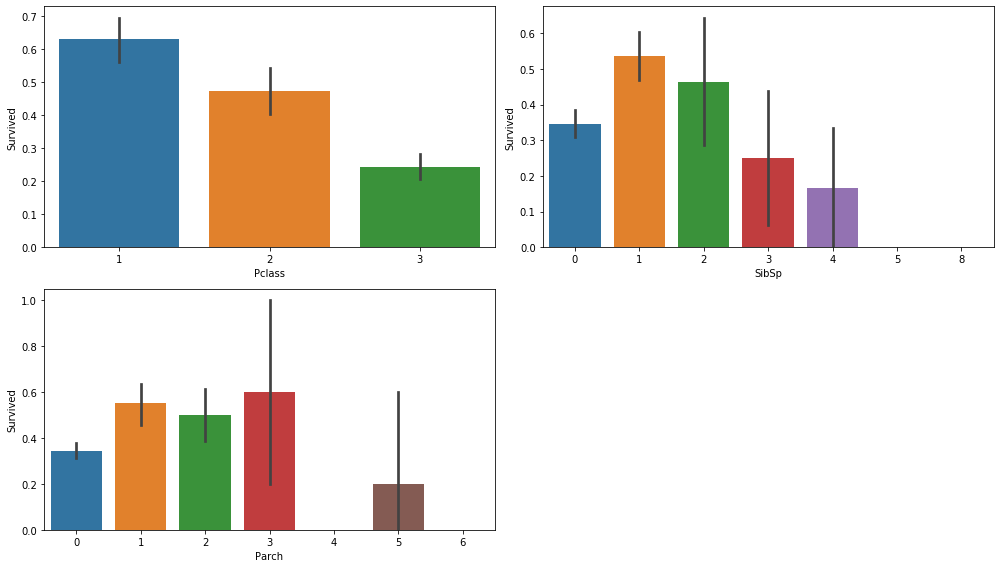

In [8]:
num_plot = ['Pclass', 'SibSp', 'Parch']

fig = plt.figure(figsize=(14,8))

for i in range(num_data[num_plot].shape[1]):
    fig.add_subplot(2,2,i+1)
    sns.barplot(x=num_data[num_plot].iloc[:,i].dropna(), y=num_data.Survived)
    
plt.tight_layout()

#### Box plots

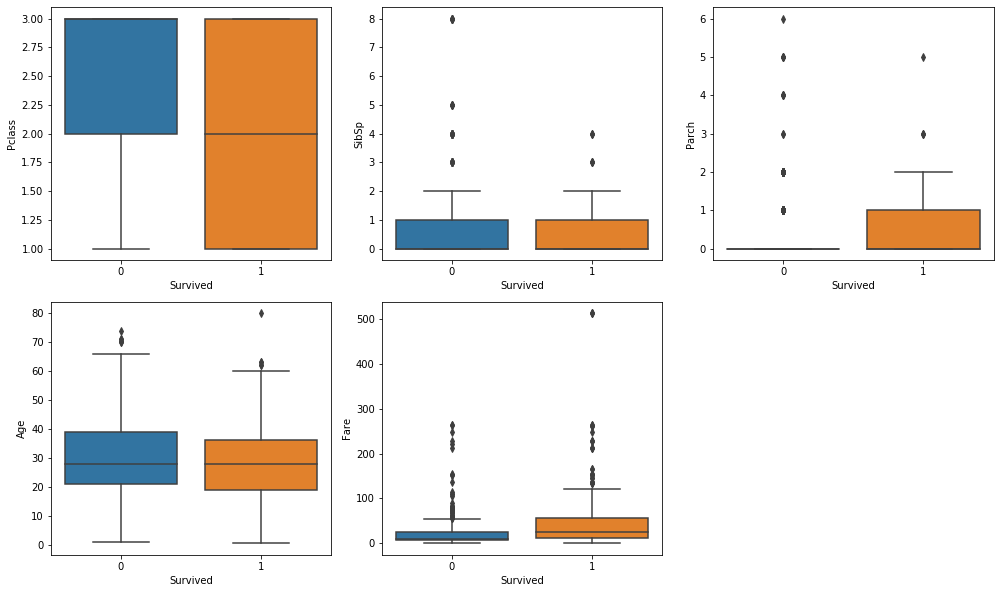

In [9]:
num_plot = ['Pclass', 'SibSp', 'Parch', 'Age', 'Fare']

fig = plt.figure(figsize=(14,12))

for i in range(num_data[num_plot].shape[1]):
    fig.add_subplot(3,3,i+1)
    sns.boxplot(y=num_data[num_plot].iloc[:,i].dropna(), x='Survived', data=num_data)
    
plt.tight_layout()

#### Pair plots

C:\Users\laure\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


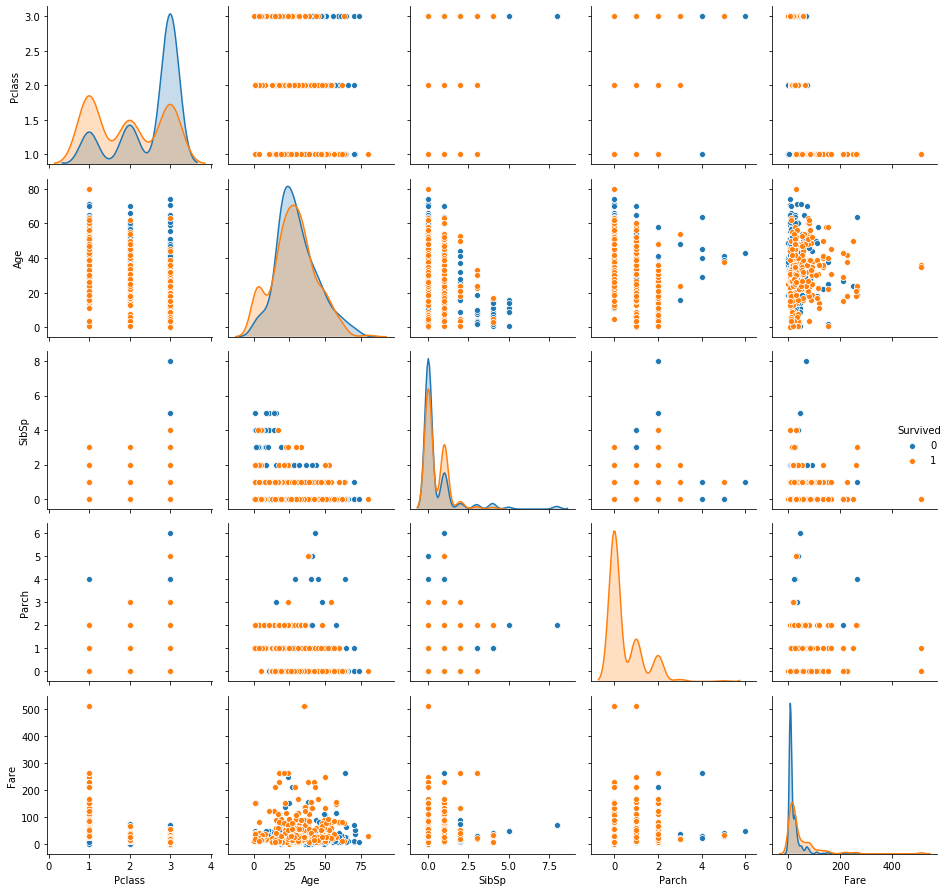

In [10]:
sns.pairplot(num_data, hue='Survived')
    
plt.tight_layout()

#### Correlation plot

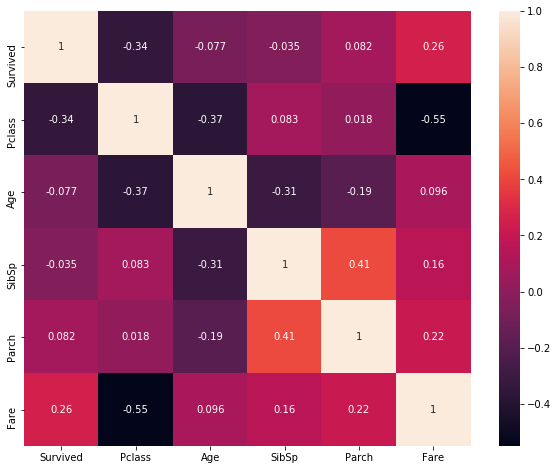

In [11]:
corr = titanic_data.corr()

fig = plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)

In [12]:
corr['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

#### Missing values

In [13]:
num_data.isnull().sum().sort_values(ascending=False)

Age         177
Fare          0
Parch         0
SibSp         0
Pclass        0
Survived      0
dtype: int64

### 2. Categorical columns

In [14]:
cat_cols = titanic_data.select_dtypes(include=['object']).columns

cat_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [15]:
cat_data = titanic_data[cat_cols]

cat_data.describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Gustafsson, Mr. Alfred Ossian",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [16]:
cat_data.shape

(891, 5)

There are 5 categorical columns

#### Count plots

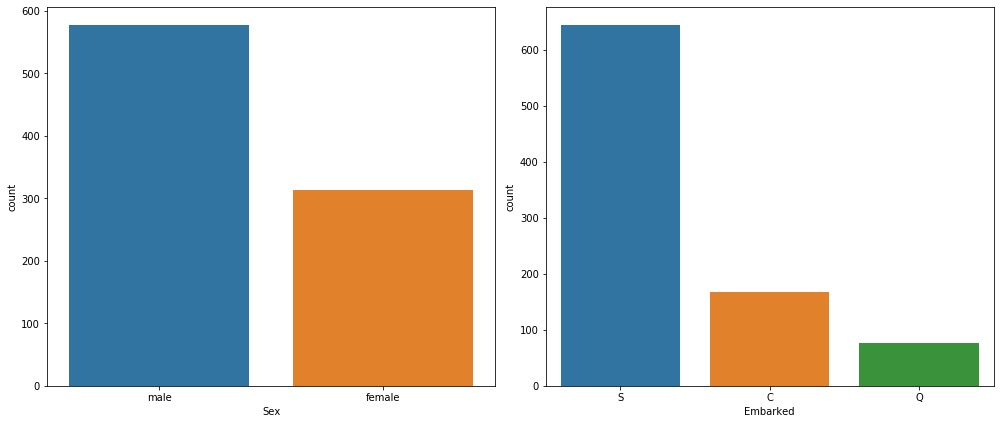

In [17]:
cat_plot = ['Sex', 'Embarked']

fig = plt.figure(figsize=(14,6))

for i in range(cat_data[cat_plot].shape[1]):
    fig.add_subplot(1,2,i+1)
    sns.countplot(cat_data[cat_plot].iloc[:,i].dropna())
    
plt.tight_layout()

#### Bar plots

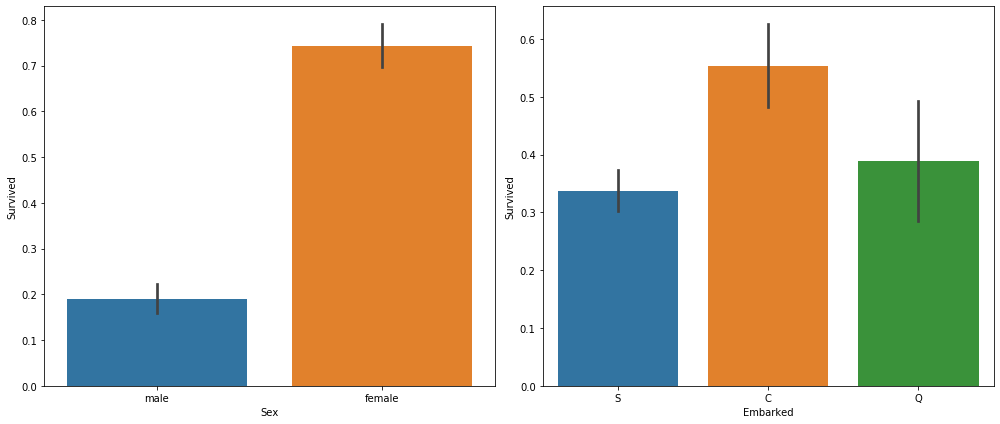

In [18]:
fig = plt.figure(figsize=(14,6))

for i in range(cat_data[cat_plot].shape[1]):
    fig.add_subplot(1,2,i+1)
    sns.barplot(x=cat_data[cat_plot].iloc[:,i].dropna(), y=num_data.Survived, data=cat_data[cat_plot])
    
plt.tight_layout()

#### Missing values

In [19]:
cat_data.isnull().sum().sort_values(ascending=False)

Cabin       687
Embarked      2
Ticket        0
Sex           0
Name          0
dtype: int64

The Cabin column has a lot of missing values (more than 2/3 of total data), we should consider dropping it.

## II. Data Cleaning and Preprocessing

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

### 1. Dealing with missing values

In [21]:
# Create copy of dataset before doing operations on it
data_copy = titanic_data.copy()
y = data_copy.Survived

data_copy['Embarked'] = data_copy['Embarked'].fillna(data_copy['Embarked'].mode())
data_copy['Age'] = data_copy['Age'].fillna(data_copy['Age'].median())

#Checking for remaining missing values
data_copy.isnull().sum().sort_values(ascending=False)

Cabin       687
Embarked      2
Fare          0
Ticket        0
Parch         0
SibSp         0
Age           0
Sex           0
Name          0
Pclass        0
Survived      0
dtype: int64

## III. Feature Selection and Engineering

In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### 1. Dropping features

In [23]:
# The name and ticket number should not have a link with survival so we can drop 
# these columns
cols_drop = ['Name', 'Ticket', 'Cabin']
X_drop = data_copy.drop(cols_drop, axis=1)

X_drop.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
241,0,3,female,28.0,1,0,14.4542,C
173,1,3,female,1.0,1,1,11.1333,S
683,0,3,male,20.0,0,0,9.2250,S
816,0,1,male,28.0,0,0,0.0000,S
106,0,3,male,28.0,0,0,7.8958,S


### 2. Creating new features

In [24]:
# Size of family
X_drop['FamilySize'] = X_drop['SibSp'] + X_drop['Parch'] + 1

# Alone
X_drop['IsAlone'] = 1 #initialize to yes/1 if alone
X_drop['IsAlone'].loc[X_drop['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

# Fare bin
X_drop['FareBin'] = pd.qcut(X_drop['Fare'], 4)

# Age bin
X_drop['AgeBin'] = pd.cut(X_drop['Age'].astype(int), 5)

# Title
X_drop['Title'] = data_copy['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

X_plus = X_drop
X_plus.sample(5)

C:\Users\laure\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,FareBin,AgeBin,Title
PassengerId,,,,,,,,,,,,,
739,0,3,male,28.0,0,0,7.8958,S,1,1,"(-0.001, 7.91]","(16.0, 32.0]",Mr
315,0,2,male,43.0,1,1,26.2500,S,3,0,"(14.454, 31.0]","(32.0, 48.0]",Mr
300,1,1,female,50.0,0,1,247.5208,C,2,0,"(31.0, 512.329]","(48.0, 64.0]",Mrs
132,0,3,male,20.0,0,0,7.0500,S,1,1,"(-0.001, 7.91]","(16.0, 32.0]",Mr
516,0,1,male,47.0,0,0,34.0208,S,1,1,"(31.0, 512.329]","(32.0, 48.0]",Mr


In [25]:
X_drop['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Lady              1
the Countess      1
Jonkheer          1
Mme               1
Sir               1
Ms                1
Capt              1
Don               1
Name: Title, dtype: int64

We can regroup the rare titles into a single category.

In [26]:
title_names = (X_drop['Title'].value_counts() < 10)
X_drop['Title'] = X_drop['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(X_drop['Title'].value_counts())

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64


### 3. Encoding categorical features

In [27]:
cols_enc = ['FareBin', 'AgeBin', 'Title', 'Sex']

label_encoder = LabelEncoder()
for col in cols_enc:
    X_plus[col] = label_encoder.fit_transform(X_plus[col])

X_enc = pd.get_dummies(X_plus)

X_enc.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,FareBin,AgeBin,Title,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,
329,1,3,0,31.0,1,1,20.5250,3,0,2,1,4,0,0,1
43,0,3,1,28.0,0,0,7.8958,1,1,0,1,3,1,0,0
485,1,1,1,25.0,1,0,91.0792,2,0,3,1,3,1,0,0
11,1,3,0,4.0,1,1,16.7000,3,0,2,0,2,0,0,1
686,0,2,1,25.0,1,2,41.5792,4,0,3,1,3,1,0,0


### 4. Selecting the best features

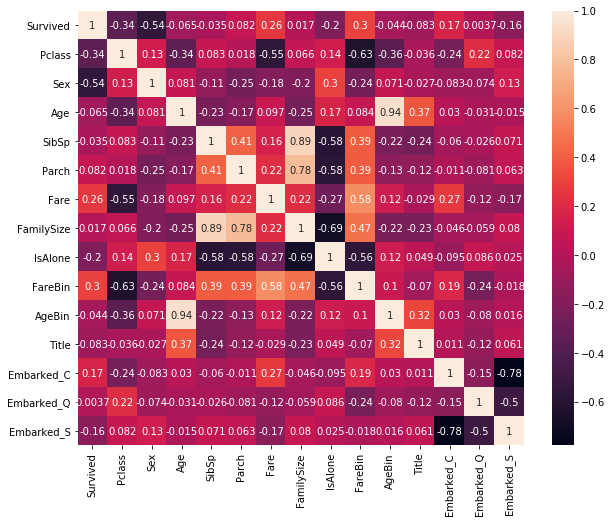

In [28]:
X_enc['Survived'] = y
X_corr = X_enc.corr()

fig = plt.figure(figsize=(10,8))
sns.heatmap(X_corr, annot=True)

In [29]:
X_corr['Survived'].sort_values(ascending=False)

Survived      1.000000
FareBin       0.299357
Fare          0.257307
Embarked_C    0.168240
Parch         0.081629
FamilySize    0.016639
Embarked_Q    0.003650
SibSp        -0.035322
AgeBin       -0.044492
Age          -0.064910
Title        -0.083292
Embarked_S   -0.155660
IsAlone      -0.203367
Pclass       -0.338481
Sex          -0.543351
Name: Survived, dtype: float64

In [30]:
# Dropping non relevant or redundant features
cols_drop_2 = ['Age', 'FamilySize', 'Fare', 'Survived']

X = X_enc.drop(cols_drop_2, axis=1)

X.sample(5)

,Pclass,Sex,SibSp,Parch,IsAlone,FareBin,AgeBin,Title,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
109,3,1,0,0,1,0,2,3,0,0,1
860,3,1,0,0,1,0,1,3,1,0,0
130,3,1,0,0,1,0,2,3,0,0,1
414,2,1,0,0,1,0,1,3,0,0,1
779,3,1,0,0,1,0,1,3,0,1,0


### 5. Scaling the features

In [31]:
std_scaler = StandardScaler()

X_scaled = pd.DataFrame(std_scaler.fit_transform(X))

X_scaled.sample(5)

,0,1,2,3,4,5,6,7,8,9,10
42,0.827377,0.737695,-0.474545,-0.473674,0.811922,-1.339737,-0.355405,0.289392,2.074505,-0.307562,-1.614710
508,0.827377,0.737695,-0.474545,-0.473674,0.811922,0.449927,-0.355405,0.289392,-0.482043,-0.307562,0.619306
864,-0.369365,0.737695,-0.474545,-0.473674,0.811922,-0.444905,-0.355405,0.289392,-0.482043,-0.307562,0.619306
525,0.827377,0.737695,-0.474545,-0.473674,0.811922,-1.339737,0.876757,0.289392,-0.482043,3.251373,-1.614710
841,-0.369365,0.737695,-0.474545,-0.473674,0.811922,-0.444905,-1.587566,0.289392,-0.482043,-0.307562,0.619306


## IV Model Selection

In [32]:
from sklearn.model_selection import cross_val_score, cross_val_predict, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

### 1. Testing different models

In [64]:
accuracy_comparison = pd.Series()
accuracy_comparison.index.name = 'Model'

# Logistic Regression
logistic_model = LogisticRegression(solver='liblinear', penalty='l2', C=20)
logistic_accuracy = cross_val_score(logistic_model, X, y, cv=5, scoring='accuracy')

accuracy_comparison['Logistic Regression'] = logistic_accuracy.mean()

# Stochastic Gradient Descent Classifier
sgd_model = SGDClassifier()
sgd_accuracy = cross_val_score(sgd_model, X, y, cv=5, scoring='accuracy')

accuracy_comparison['SGD Classifier'] = sgd_accuracy.mean()

# Kernel Support Vector Machine (SVM)
ksvm_model = SVC(kernel='rbf', C=350, gamma=0.0009, degree=1)
ksvm_accuracy = cross_val_score(ksvm_model, X, y, cv=5, scoring='accuracy')

accuracy_comparison['Kernel SVM'] = ksvm_accuracy.mean()

# Random Forest
rf_model = RandomForestClassifier(n_estimators=450, min_samples_split=4,
                                  min_samples_leaf=3, max_depth=35)
rf_accuracy = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

accuracy_comparison['Random Forest'] = rf_accuracy.mean()

# XGBClassifier
xgb_model = XGBClassifier(learning_rate=0.004, max_depth=3, n_estimators=300)
xgb_accuracy = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')

accuracy_comparison['XGB Classifier'] = xgb_accuracy.mean()

# KNN
knn_model = KNeighborsClassifier(weights='uniform', n_neighbors=6)
knn_accuracy = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')

accuracy_comparison['KNN Classifier'] = knn_accuracy.mean()

print('Mean Accuracy for Different Models: ')
print(accuracy_comparison.sort_values(ascending=False))

C:\Users\laure\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


Mean Accuracy for Different Models: 
Model
XGB Classifier         0.828278
Random Forest          0.817086
Kernel SVM             0.813659
Logistic Regression    0.795757
KNN Classifier         0.793503
SGD Classifier         0.768809
dtype: float64


### 2. Hyperparameter Tuning

#### Random Forest

In [34]:
# # Random Forest - Randomized Search
# rf_param_distributions ={
#     'n_estimators': [100,200,300,400,500,600,700],
#     'max_depth': [10,20,30,40,50],
#     'min_samples_leaf': [1,2,3,4,5],
#     'min_samples_split': [2,3,4,5,6]
# }

# rf_model = RandomForestClassifier()
# rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_distributions,
#                                n_iter=100, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
# rf_random.fit(X,y)

# print('Best params:', rf_random.best_params_)
# print('Best score:', rf_random.best_score_)

In [35]:
# # Random Forest - Grid Search
# rf_param_grid ={
#     'n_estimators': [450,500,550],
#     'max_depth': [35,40,45],
#     'min_samples_leaf': [1,2,3],
#     'min_samples_split': [4,5,6]
# }

# rf_model = RandomForestClassifier()
# rf_grid = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, 
#                        scoring='accuracy', verbose=2, n_jobs=-1)
# rf_grid.fit(X,y)

# print('Best params:', rf_grid.best_params_)
# print('Best score:', rf_grid.best_score_)

#### SVM

In [36]:
# # SVM - Randomized Search
# svm_param_distributions ={
#     'C': [0.1,1,10,100],
#     'gamma': [1,0.1,0.01,0.001],
#     'degree': [1,2,3],
#     'kernel': ['rbf'],
# }

# svm_model = SVC()
# svm_random = RandomizedSearchCV(estimator=svm_model, param_distributions=svm_param_distributions,
#                                n_iter=100, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
# svm_random.fit(X,y)

# print('Best params:', svm_random.best_params_)
# print('Best score:', svm_random.best_score_)

In [37]:
# # SVM - Grid Search
# svm_param_grid ={
#     'C': [300,350,400],
#     'gamma': [0.0008,0.0009,0.001],
#     'degree': [1,2],
#     'kernel': ['rbf'],
# }

# svm_model = SVC()
# svm_grid = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=5,
#                         scoring='accuracy', verbose=2, n_jobs=-1)
# svm_grid.fit(X,y)

# print('Best params:', svm_grid.best_params_)
# print('Best score:', svm_grid.best_score_)

#### Logistic Regression

In [38]:
# # Logistic - Randomized Search
# logistic_param_distributions ={
#     'penalty': ['l1','l2'],
#     'C': [0.1,1,10,100],
#     'solver': ['liblinear']
# }

# logistic_model = LogisticRegression()
# logistic_random = RandomizedSearchCV(estimator=logistic_model, param_distributions=logistic_param_distributions,
#                                n_iter=100, cv=5, scoring='accuracy', verbose=2,
#                                random_state=42, n_jobs=-1)
# logistic_random.fit(X,y)

# print('Best params:', logistic_random.best_params_)
# print('Best score:', logistic_random.best_score_)

In [39]:
# # Logistic - Randomized Search
# logistic_param_grid ={
#     'penalty': ['l1','l2'],
#     'C': [15,20,25],
#     'solver': ['liblinear']
# }

# logistic_model = LogisticRegression()
# logistic_grid = GridSearchCV(estimator=logistic_model, param_grid=logistic_param_grid,
#                              cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
# logistic_grid.fit(X,y)

# print('Best params:', logistic_grid.best_params_)
# print('Best score:', logistic_grid.best_score_)

#### XGB Classifier

In [40]:
# XGB Classifier - Randomized Search
xgb_param_distributions ={
    'learning_rate': [0.001,0.1,1],
    'n_estimators': [100,200,300,400,500,600,700,800],
    'max_depth': [2,3,4,5,6]
}

xgb_model = XGBClassifier()
xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_distributions,
                               n_iter=100, cv=5, scoring='accuracy', verbose=2,
                               random_state=42, n_jobs=-1)
xgb_random.fit(X,y)

print('Best params:', xgb_random.best_params_)
print('Best score:', xgb_random.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   30.1s


Best params: {'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.1}
Best score: 0.8271608813006089


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   43.6s finished


In [63]:
# XGB Classifier - Grid Search
xgb_param_grid ={
    'learning_rate': [0.004,0.005,0.006],
    'n_estimators': [250,300,350],
    'max_depth': [2,3,4]
}

xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, 
                              cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
xgb_grid.fit(X,y)

print('Best params:', xgb_grid.best_params_)
print('Best score:', xgb_grid.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    6.3s finished


Best params: {'learning_rate': 0.004, 'max_depth': 3, 'n_estimators': 350}
Best score: 0.8294017952419811


#### KNeighbors Classifier

In [42]:
# # KNeighbors Classifier - Randomized Search
# knn_param_distributions ={
#     'n_neighbors': [i for i in range(1,30)],
#     'weights':['uniform','distance'],    
# }

# knn_model = KNeighborsClassifier()
# knn_random = RandomizedSearchCV(estimator=knn_model, param_distributions=knn_param_distributions,
#                                n_iter=100, cv=5, scoring='accuracy', verbose=2,
#                                random_state=42, n_jobs=-1)
# knn_random.fit(X,y)

# print('Best params:', knn_random.best_params_)
# print('Best score:', knn_random.best_score_)

### 3. Performance measures

In [65]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

#### Confusion matrix

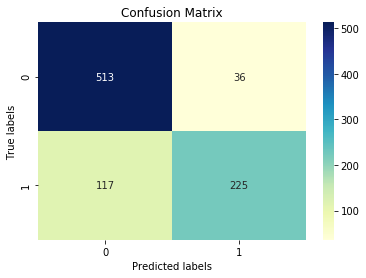

In [67]:
xgb_model = XGBClassifier(learning_rate=0.004, max_depth=3, n_estimators=300)
y_pred = cross_val_predict(xgb_model, X, y, cv=5)

xgb_confusion = confusion_matrix(y, y_pred)

def plot_confusion_matrix(matrix):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap='YlGnBu')

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix') 
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1']);
    
plot_confusion_matrix(xgb_confusion)

#### Precsion and Recall

In [68]:
print('XGBoost precision score:', precision_score(y_pred, y))
print('XGBoost recall score:', recall_score(y_pred, y))
print('XGBoost f1 score:', f1_score(y_pred, y))

XGBoost precision score: 0.6578947368421053
XGBoost recall score: 0.8620689655172413
XGBoost f1 score: 0.746268656716418


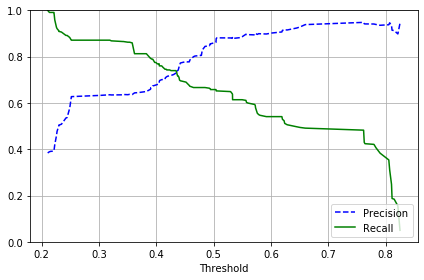

In [69]:
y_proba = cross_val_predict(xgb_model, X, y, cv=5, method='predict_proba')
y_pred = y_proba[:,1] # proba of positive class

precisions, recalls, thresholds = precision_recall_curve(y, y_pred)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    ax = plt.subplot()
    ax.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    ax.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    
    ax.set(ylim=[0,1])
    ax.grid(True)
    ax.set_xlabel('Threshold')
    ax.legend(loc='lower right')
    plt.tight_layout()
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

#### ROC Curve

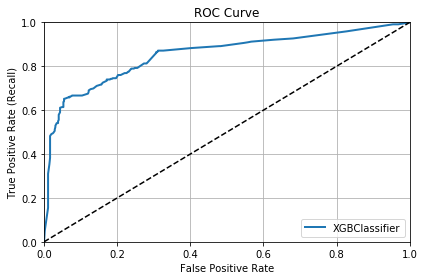

In [70]:
y_proba = cross_val_predict(xgb_model, X, y, cv=5, method='predict_proba')
y_pred = y_proba[:,1] # proba of positive class

fpr, tpr, thresholds = roc_curve(y, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    ax = plt.subplot()
    ax.plot(fpr, tpr, linewidth=2, label=label)
    ax.plot([0,1],[0,1],'k--')

    ax.set(xlim=[0,1],ylim=[0,1])
    ax.grid(True)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate (Recall)')
    ax.legend(loc='lower right')
    plt.title('ROC Curve')
    plt.tight_layout()
    
plot_roc_curve(fpr, tpr, 'XGBClassifier')

In [71]:
xgb_roc_auc = roc_auc_score(y, y_pred)

print('XGBoost ROC AUC Score:', xgb_roc_auc)

XGBoost ROC AUC Score: 0.8534363382652137


## V. Submission

In [72]:
# path to file you will use for predictions
test_data_path = './titanic/test.csv'

# read test data file using pandas
test_data = pd.read_csv(test_data_path, index_col='PassengerId')

test_data.sample(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1204,3,"Sadowitz, Mr. Harry",male,NaN,0,0,LP 1588,7.5750,NaN,S
1269,2,"Cotterill, Mr. Henry Harry""""",male,21.0,0,0,29107,11.5000,NaN,S
1118,3,"Asplund, Mr. Johan Charles",male,23.0,0,0,350054,7.7958,NaN,S
976,2,"Lamb, Mr. John Joseph",male,NaN,0,0,240261,10.7083,NaN,Q
1200,1,"Hays, Mr. Charles Melville",male,55.0,1,1,12749,93.5000,B69,S


In [73]:
test_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [74]:
test_data.isnull().sum().sort_values(ascending=False)

Cabin       327
Age          86
Fare          1
Embarked      0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
dtype: int64

### 1. Test data cleaning and preprocessing

In [75]:
X_test = test_data.copy()

# Dealing with missing values
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].median())
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].median())

# Dropping non relevant features
X_test = X_test.drop(cols_drop, axis=1)

# Adding new features
X_test['FamilySize'] = X_test['SibSp'] + X_test['Parch'] + 1

X_test['FareBin'] = pd.qcut(X_test['Fare'], 4)

X_test['AgeBin'] = pd.cut(X_test['Age'].astype(int), 5)

X_test['IsAlone'] = 1 #initialize to yes/1 if alone
X_test['IsAlone'].loc[X_test['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

X_test['Title'] = test_data['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
title_names = (X_test['Title'].value_counts() < 10)
X_test['Title'] = X_test['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

# Encoding
label_encoder = LabelEncoder()
for col in cols_enc:
    X_test[col] = label_encoder.fit_transform(X_test[col])
X_test = pd.get_dummies(X_test)

# Dropping redundant features
X_test = X_test.drop(['Age', 'FamilySize', 'Fare'], axis=1) 

# Scaling the data
X_test = pd.DataFrame(std_scaler.transform(X_test))

# Ensure test data is encoded in the same manner as training data
final_train, final_test = X_scaled.align(X_test, join='left', axis=1)
final_train = final_train.fillna(0)
final_test = final_test.fillna(0)

C:\Users\laure\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


### 2. Create final model

In [76]:
# Create the final model
final_model = XGBClassifier(learning_rate=0.004, max_depth=3, n_estimators=300)

# Fitting the final model usin all the data
final_model.fit(final_train, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.004, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### 3. Make predictions for submission

In [77]:
# Making predictions for submission
test_predictions = final_model.predict(final_test)

# Save test predictions to file
output = pd.DataFrame({'PassengerId': test_data.index,
                       'Survived': test_predictions})
output.to_csv('submission.csv', index=False)

print('CSV created')

CSV created
